In [1]:
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torchvision.models import MobileNetV2
from torch import nn
from torch.optim import SGD

from train import *
from loaders import CustomDataLoader, ShuffleOnce, RandomReshuffling

In [2]:
# !conda install -y -c conda-forge ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [3]:
toTensor = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_dataset = datasets.CIFAR10(
    root="./data", train=True, transform=toTensor, download=True
)

test_dataset = datasets.CIFAR10(
    root="./data", train=False, transform=toTensor, download=True
)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
N_EPOCHS = 2
BATCH_SIZE = 32
DEVICE="cpu"
loss_fn = nn.CrossEntropyLoss()


In [8]:
def experiment(train_loader, test_loader):
    model = MobileNetV2(num_classes=10)
    sgd = SGD(model.parameters(), lr=0.1, momentum=0)

    train_loss_data = []
    train_acc_data = []
    test_loss_data = []
    test_acc_data = []
    
    for epoch in range(N_EPOCHS):
        print(f"Epoch {epoch+1}/{N_EPOCHS}")
        c_train_loss_data, c_acc_data = train_model(train_loader, model, loss_fn, sgd, device=DEVICE, verbose=True)
        train_loss_data += c_train_loss_data
        train_acc_data += c_acc_data
        c_test_loss_data, acc, test_acc_data = test_model(test_loader, model, loss_fn, device=DEVICE, verbose=True)
        test_loss_data += c_test_loss_data
        test_acc_data += test_acc_data
        
    return train_loss_data, train_acc_data, test_loss_data, test_acc_data

data = []
labels = []

In [6]:
# train_loader = CustomDataLoader(train_dataset, batch_size=BATCH_SIZE)
# test_loader = CustomDataLoader(test_dataset, batch_size=BATCH_SIZE)

# theor_sgd_data = experiment(train_loader, test_loader)
# data.append(theor_sgd_data)
# labels.append("Theoretical SGD")

In [9]:
train_loader = ShuffleOnce(train_dataset, batch_size=BATCH_SIZE)
test_loader = ShuffleOnce(test_dataset, batch_size=BATCH_SIZE)

so_data = experiment(train_loader, test_loader)
data.append(so_data)
labels.append("Shuffle Once")

Epoch 1/2


100%|██████████| 313/313 [00:07<00:00, 41.20it/s, loss=1.430133, acc={tensor(0.4373)}] 


Epoch 2/2


 17%|█▋        | 259/1563 [00:45<05:03,  4.30it/s, loss=1.4234879]

In [ ]:
train_loader = RandomReshuffling(train_dataset, batch_size=BATCH_SIZE)
test_loader = RandomReshuffling(test_dataset, batch_size=BATCH_SIZE)

rr_data = experiment(train_loader, test_loader)
data.append(rr_data)
labels.append("Random reshuffling")

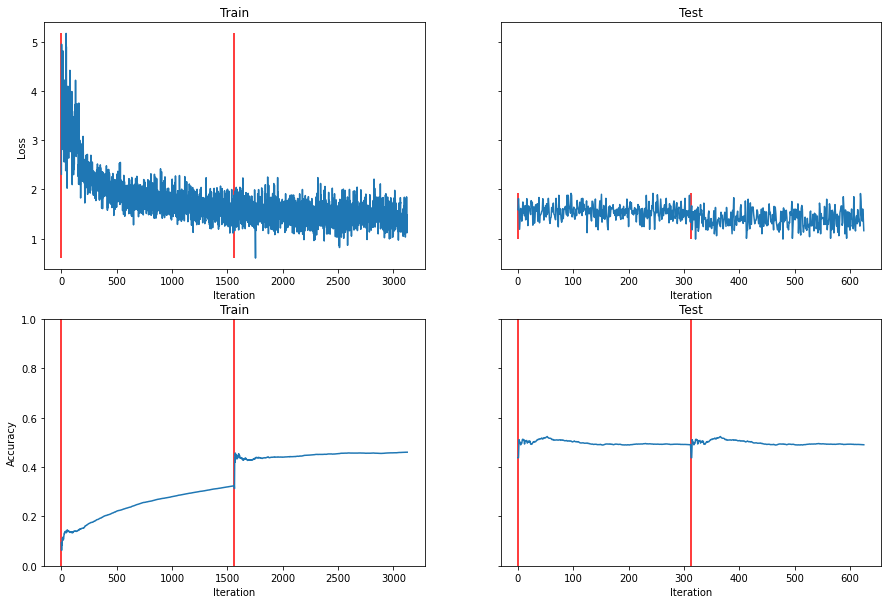

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey='row')
for epoch in range(N_EPOCHS):
        axs[0][0].vlines(epoch * len(train_loader), min(data[0][0]), max(data[0][0]), colors='r')
        axs[0][1].vlines(epoch * len(test_loader), min(data[0][2]), max(data[0][2]), colors='r')
        
        axs[1][0].vlines(epoch * len(train_loader), 0, 1, colors='r')
        axs[1][1].vlines(epoch * len(test_loader), 0, 1, colors='r')

axs[0][0].set_xlabel("Iteration")
axs[0][1].set_xlabel("Iteration")
axs[0][0].set_ylabel("Loss")
axs[0][0].set_title("Train")
axs[0][1].set_title("Test")
for i, (train_loss_data, train_acc_data, test_loss_data, test_acc_data) in enumerate(data):
    axs[0][0].plot(train_loss_data)
    axs[0][1].plot(test_loss_data)
    axs[1][0].plot(train_acc_data)
    axs[1][1].plot(test_acc_data)

axs[1][0].set_xlabel("Iteration")
axs[1][1].set_xlabel("Iteration")
axs[1][0].set_ylabel("Accuracy")
axs[1][0].set_title("Train")
axs[1][1].set_title("Test")
axs[1][0].set_ylim((0, 1))
axs[1][1].set_ylim((0, 1))
plt.show()